Input file: `insurance_p1.csv` dataset from project 1. Packed with information on health insurance customers.

## insurance.csv
| Column    | Data Type | Description                                                      |
|-----------|-----------|------------------------------------------------------------------|
| `age`       | int       | Age of the beneficiary.                                  |
| `gender`    | object    | male or female.             |
| `bmi`       | float     | Body mass index, a key indicator of body fat based on height and weight. |
| `children`  | int       | Number of childrens.              |
| `smoker`    | object    | Indicates whether the beneficiary smokes (yes or no).            |
| `region`    | object    | The beneficiary's residential area in the US, divided into four regions. |
| `charges`   | float     | Individual medical costs billed by health insurance.             |

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

# Loading the insurance dataset as outout from project 1
df = pd.read_csv('insurance_p1.csv')
df.sort_values(by=["charges"], ascending=False).head()

,age,bmi,children,smoker,charges,region_northeast,region_northwest,region_southwest,is_male
492,54.0,47.410,0.0,1,63770.42801,0,0,0,0
1173,45.0,30.360,0.0,1,62592.87309,0,0,0,1
1110,52.0,34.485,3.0,1,60021.39897,0,1,0,1
522,31.0,38.095,1.0,1,58571.07448,1,0,0,0
735,33.0,35.530,0.0,1,55135.40209,0,1,0,0


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

def regression_models(X_train, X_test, y_train, y_test):    
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    lr_preds = lr_model.predict(X_test)
    
    dt_model = DecisionTreeRegressor(random_state=42)
    dt_model.fit(X_train, y_train)
    dt_preds = dt_model.predict(X_test)
    
    rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
    rf_model.fit(X_train, y_train)
    rf_preds = rf_model.predict(X_test)
    
    xgb_model = XGBRegressor(random_state=42)
    xgb_model.fit(X_train, y_train)
    xgb_preds = xgb_model.predict(X_test)
    
    return lr_model, lr_preds, dt_model, dt_preds, rf_model, rf_preds, xgb_model, xgb_preds

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(name, y_test, preds):
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    # Calculate mean of the target values
    mean_target = np.mean(y_test)
    
    # Calculate errors as a percentage of the mean target
    mae_percent = (mae / mean_target) * 100
    rmse_percent = (rmse / mean_target) * 100

    print(f"Model: {name}")
    print(f"  MAE: {mae:.2f} ({mae_percent:.2f}%)")
    print(f"  RMSE: {rmse:.2f} ({rmse_percent:.2f}%)")
    print(f"  R²: {r2:.2f}\n")
    
    return {
        "Model": name,
        "MAE": mae,
        "MAE (%)": mae_percent,
        "RMSE": rmse,
        "RMSE (%)": rmse_percent,
        "R²": r2
    }

In [55]:
X = df.drop(columns=['charges'])

y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(lr_model, lr_preds, dt_model, dt_preds, rf_model, rf_preds, xgb_model, xgb_preds) = regression_models(X_train, X_test, y_train, y_test)

In [56]:
results = []
results.append(evaluate_model("Linear Regression", y_test, lr_preds))
results.append(evaluate_model("Decision Tree", y_test, dt_preds))
results.append(evaluate_model("Random Forest", y_test, rf_preds))
results.append(evaluate_model("XGBoost", y_test, xgb_preds))

Model: Linear Regression
  MAE: 4378.72 (33.63%)
  RMSE: 6319.54 (48.54%)
  R²: 0.70

Model: Decision Tree
  MAE: 3002.05 (23.06%)
  RMSE: 6545.32 (50.27%)
  R²: 0.68

Model: Random Forest
  MAE: 2875.12 (22.08%)
  RMSE: 4887.20 (37.54%)
  R²: 0.82

Model: XGBoost
  MAE: 3076.33 (23.63%)
  RMSE: 5309.42 (40.78%)
  R²: 0.79



In [57]:
from sklearn.inspection import permutation_importance

result = permutation_importance(rf_model, X_test, y_test, n_repeats=10, random_state=42)
importance = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
importance.sort_values(by='Importance', ascending=False, inplace=True)
print(importance)


            Feature  Importance
3            smoker    1.475275
1               bmi    0.316949
0               age    0.219582
2          children    0.018727
4  region_northeast    0.007886
5  region_northwest    0.003820
6  region_southwest   -0.002050
7           is_male   -0.004026


In [58]:
X.drop(columns=["region_northeast", "region_northwest", "region_southwest", "is_male"], inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

(lr_model, lr_preds, dt_model, dt_preds, rf_model, rf_preds, xgb_model, xgb_preds) = regression_models(X_train, X_test, y_train, y_test)


In [59]:
results = []
results.append(evaluate_model("Linear Regression", y_test, lr_preds))
results.append(evaluate_model("Decision Tree", y_test, dt_preds))
results.append(evaluate_model("Random Forest", y_test, rf_preds))
results.append(evaluate_model("XGBoost", y_test, xgb_preds))

Model: Linear Regression
  MAE: 4380.95 (33.65%)
  RMSE: 6327.89 (48.60%)
  R²: 0.70

Model: Decision Tree
  MAE: 3202.22 (24.60%)
  RMSE: 6745.53 (51.81%)
  R²: 0.66

Model: Random Forest
  MAE: 2973.09 (22.84%)
  RMSE: 5039.36 (38.71%)
  R²: 0.81

Model: XGBoost
  MAE: 3084.44 (23.69%)
  RMSE: 5407.98 (41.54%)
  R²: 0.78



In [66]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=2, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}


In [67]:
optimized_rf_model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

optimized_rf_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_leaf=4, min_samples_split=10,
                      n_estimators=300, random_state=42)

In [68]:
# Predictions with the optimized model
optimized_rf_preds = optimized_rf_model.predict(X_test)

# Evaluate the optimized model
optimized_results = evaluate_model("Optimized Random Forest", y_test, optimized_rf_preds)


Model: Optimized Random Forest
  MAE: 2732.74 (20.99%)
  RMSE: 4648.81 (35.71%)
  R²: 0.84



In [ ]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_
sorted_idx = np.argsort(feature_importances)
plt.barh(X_train.columns[sorted_idx], feature_importances[sorted_idx])
plt.title("Feature Importance")
plt.show()


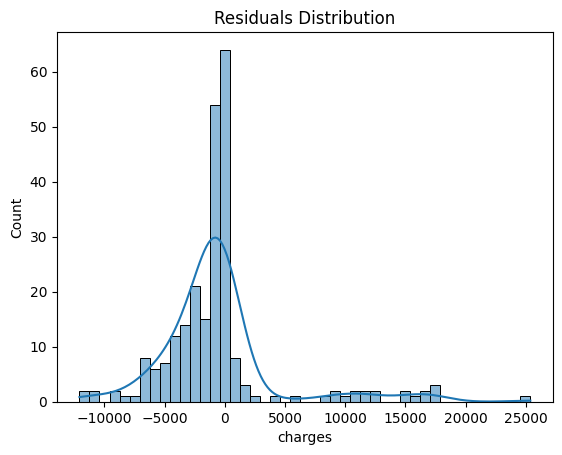

In [60]:
residuals = y_test - rf_model.predict(X_test)
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.show()


In [61]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.3f} ± {scores.std():.3f}")


Cross-validated R²: 0.827 ± 0.020


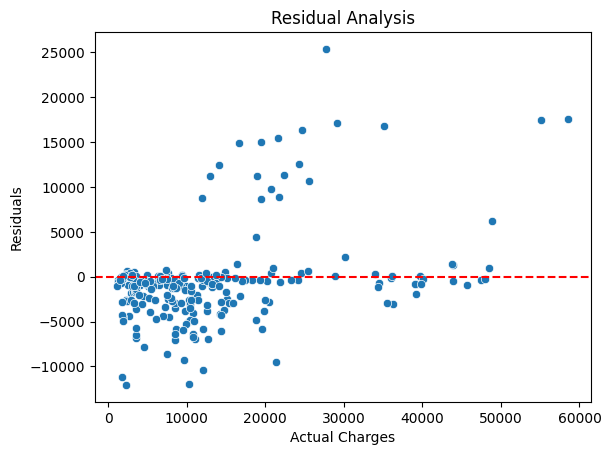

In [62]:
residuals = y_test - rf_model.predict(X_test)
sns.scatterplot(x=y_test, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Actual Charges')
plt.ylabel('Residuals')
plt.show()



               Model          MAE    MAE (%)         RMSE   RMSE (%)        R²
0  Linear Regression  4380.951713  33.648771  6327.892576  48.602638  0.704152
1      Decision Tree  3202.223996  24.595318  6745.526067  51.810355  0.663812
2      Random Forest  2973.094369  22.835443  5039.357212  38.705785  0.812371
3            XGBoost  3084.441107  23.690663  5407.980655  41.537071  0.783917


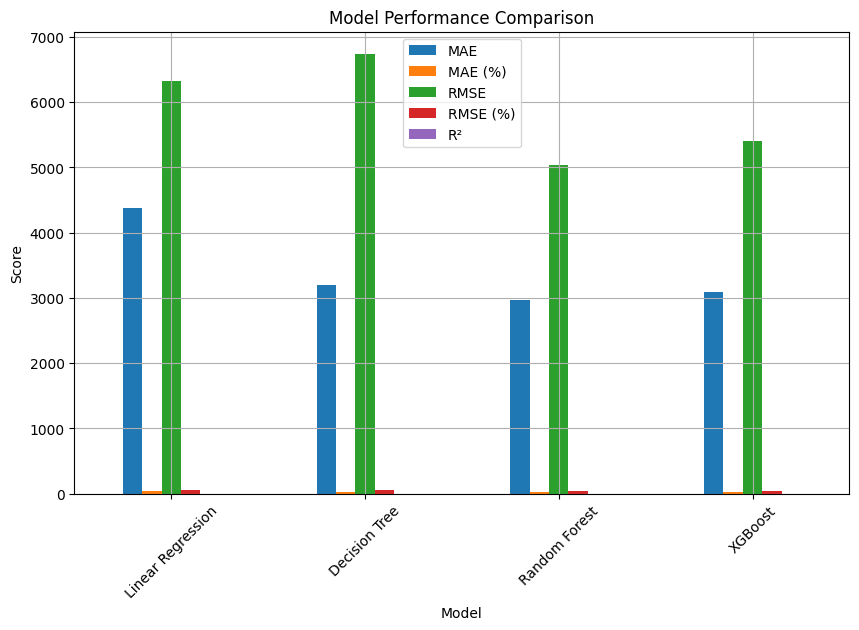

In [63]:
results_df = pd.DataFrame(results)
print(results_df)

results_df.set_index('Model').plot(kind='bar', figsize=(10, 6), grid=True)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


In [64]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_absolute_error')
print(f"Cross-validated MAE: {-scores.mean():.2f} ± {scores.std():.2f}")


Cross-validated MAE: 2733.76 ± 123.68


In [65]:
val_df = pd.read_csv('validation_dataset_insurance_p1.csv')

val_df_cleaned = clean_the_data(val_df)

val_df_num = convert_to_numerical(val_df_cleaned)

predictions = model.predict(val_df_num)

validation_data = val_df_num.copy()

validation_data['predicted_charges'] = predictions

validation_data.loc[validation_data['predicted_charges'] < 1000, 'predicted_charges'] = 1000

validation_data.head()

NameError: name 'clean_the_data' is not defined